Programa para el análisis de sentimiento de tweets.

David Martínez Méndez.

---



In [1]:
#Library import
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
#Data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [3]:
#Get tweet data
log = pd.read_csv('Login.csv')

In [4]:
#API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]

In [7]:
#Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Acces token and acces token secret
authenticate.set_access_token(accesToken, accesTokenSecret)

#API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [9]:
#Tweet extraction
posts = api.user_timeline(screen_name = "BillGates", count = 100, lang = "en", tweet_mode = "extended")

#Tweet print
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ' ) ' + tweet.full_text + '\n')
  i = i + 1

Show the 5 recent tweets: 

1 ) I applaud David Vélez and Mariel Reyes’s pledge to dedicate the majority of their wealth to creating opportunity for the most vulnerable Latin American children and young adults: https://t.co/LGZ23efAVO

2 ) Thank you to @DonorsChoose, and to all 40,255 of you who donated in support of students and teachers across the country. https://t.co/g2ABbfFtsl

3 ) This collaboration’s impact is made possible through investments in the bipartisan infrastructure bill, which will unleash billions in private capital for clean energy projects throughout the U.S. if passed into law. Thank you @SecGranholm for your partnership.

4 ) Avoiding a climate disaster will require a new, clean industrial revolution, and we don't have time to wait. Our work together will not only send us on a more viable path to net zero, but it will create long-term jobs in communities across the country.

5 ) I'm incredibly excited about the new collaboration between @Breakthrough Energy Catal

In [10]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns = ['Tweets'])

#Show fisrt 5rows of data
df.head()

,Tweets
0,I applaud David Vélez and Mariel Reyes’s pledg...
1,"Thank you to @DonorsChoose, and to all 40,255 ..."
2,This collaboration’s impact is made possible t...
3,Avoiding a climate disaster will require a new...
4,I'm incredibly excited about the new collabora...


In [11]:
#Clean the data

#Function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', ' ', text) #to remove @ mentions
  text = re.sub(r'#', ' ', text) #removes the # symbol
  text = re.sub(r'RT[\s]+', ' ', text) #removes retweet rt
  text = re.sub(r'https?:\/\/\S+', ' ', text) #removes hyperlinks

  return text

#Cleaning
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Cleaned Text
df

,Tweets
0,I applaud David Vélez and Mariel Reyes’s pledg...
1,"Thank you to , and to all 40,255 of you who d..."
2,This collaboration’s impact is made possible t...
3,Avoiding a climate disaster will require a new...
4,I'm incredibly excited about the new collabora...
...,...
95,"After you finish your pancakes this morning, c..."
96,It’s deeply unfair that the people who contrib...
97,: Over the past few weeks health workers in E...
98,I named my book “How to Avoid a Climate Disast...


In [12]:
#Function to get subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create 2 new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe
df

,Tweets,Subjectivity,Polarity
0,I applaud David Vélez and Mariel Reyes’s pledg...,0.350000,0.025000
1,"Thank you to , and to all 40,255 of you who d...",0.000000,0.000000
2,This collaboration’s impact is made possible t...,0.691667,0.122222
3,Avoiding a climate disaster will require a new...,0.530909,0.200606
4,I'm incredibly excited about the new collabora...,0.634848,0.292677
...,...,...,...
95,"After you finish your pancakes this morning, c...",0.000000,0.000000
96,It’s deeply unfair that the people who contrib...,0.800000,-0.600000
97,: Over the past few weeks health workers in E...,0.175000,-0.225000
98,I named my book “How to Avoid a Climate Disast...,0.500000,0.500000


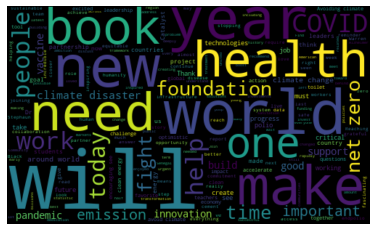

In [13]:
#Plot Text Clouds
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [14]:
#Function to cumpute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,I applaud David Vélez and Mariel Reyes’s pledg...,0.350000,0.025000,Positive
1,"Thank you to , and to all 40,255 of you who d...",0.000000,0.000000,Neutral
2,This collaboration’s impact is made possible t...,0.691667,0.122222,Positive
3,Avoiding a climate disaster will require a new...,0.530909,0.200606,Positive
4,I'm incredibly excited about the new collabora...,0.634848,0.292677,Positive
...,...,...,...,...
95,"After you finish your pancakes this morning, c...",0.000000,0.000000,Neutral
96,It’s deeply unfair that the people who contrib...,0.800000,-0.600000,Negative
97,: Over the past few weeks health workers in E...,0.175000,-0.225000,Negative
98,I named my book “How to Avoid a Climate Disast...,0.500000,0.500000,Positive


In [17]:
#Print positive tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Positive':
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) I applaud David Vélez and Mariel Reyes’s pledge to dedicate the majority of their wealth to creating opportunity for the most vulnerable Latin American children and young adults:  

2) This collaboration’s impact is made possible through investments in the bipartisan infrastructure bill, which will unleash billions in private capital for clean energy projects throughout the U.S. if passed into law. Thank you   for your partnership.

3) Avoiding a climate disaster will require a new, clean industrial revolution, and we don't have time to wait. Our work together will not only send us on a more viable path to net zero, but it will create long-term jobs in communities across the country.

4) I'm incredibly excited about the new collaboration between   Energy Catalyst and   to accelerate the adoption of next-generation clean technologies and build the net-zero economy:  

5) I’m partnering with   to make sure that more teachers have access to everything they need to get ready for the new

In [23]:
#Print negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j + 1

1) Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced   to drink it too). Was it worth it? You bet. Here’s why:  

2) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that.  

3) Dr. Stephaun Wallace ( ) has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at   are working to reach the people who are usually left behind.  

4) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:    

5)  : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…



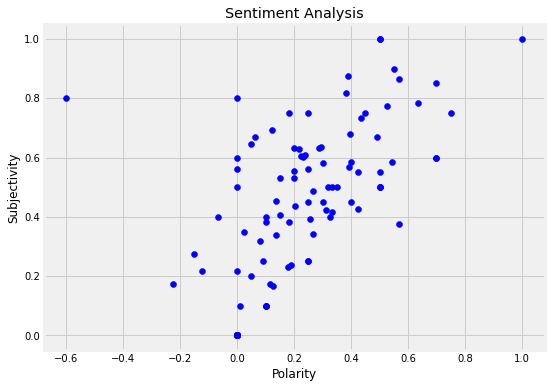

In [24]:
#Plot polarity and subjectivity
plt.figure(figsize = (8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [25]:
#Plot percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(  (ptweets.shape[0] / df.shape[0]) *100 , 1)

77.0

In [26]:
#Plot percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round(  (ntweets.shape[0] / df.shape[0]) *100 , 1)

5.0

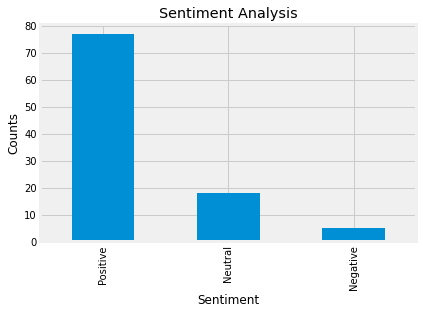

In [27]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()